# **Heart Disease Prediction**

<h2 style="font-family: 'poppins'; font-weight: bold; color: skyblue;">👨‍💻Author: Hamza Kamelen</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hamzakamelen) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hamzakamelen) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hamzakamelen)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@hamzakamelen1944) 
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hamzakamelen)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hamzakamelen.dev@gmail.com)

## **Meta-Data (About Dataset)**
## **Context**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content**
#### **Column Descriptions:**
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
  1. typical angina, 
  2. atypical angina, 
  3. non-anginal, 
  4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
  `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### **Acknowledgements**
#### **Creators:**
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### **Relevant Papers:**
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310. 
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### **Citation Request:**
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

In [2]:
# 1. To handle the data
import pandas as pd
import numpy as np

# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [115]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Explore the dataset**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [117]:
df.shape

(920, 16)

**Outcome**
- This Datset contains 920 rows and 16 columns.

**Checking Missing Values**

In [118]:
df.isnull().sum().sort_values(ascending = False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64

---

### **Imputing Missing Values**

In [119]:
df.isnull().sum().sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [121]:
# Impute missing values using Iterative Imputer
imputer = IterativeImputer(max_iter=10,n_nearest_features=5,random_state=42)
df['trestbps'] = imputer.fit_transform(df[['trestbps']])
df['chol'] = imputer.fit_transform(df[['chol']])
df['thalch'] = imputer.fit_transform(df[['thalch']])
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])
df['ca'] = imputer.fit_transform(df[['ca']])

In [122]:
df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
sex           0
age           0
chol          0
trestbps      0
cp            0
dataset       0
oldpeak       0
thalch        0
ca            0
num           0
dtype: int64

In [123]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [124]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [125]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [126]:
def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass
    
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [15]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 77.71 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.76 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [16]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**All Missing Values Imputed**

---

### **Dealing with Outliers**

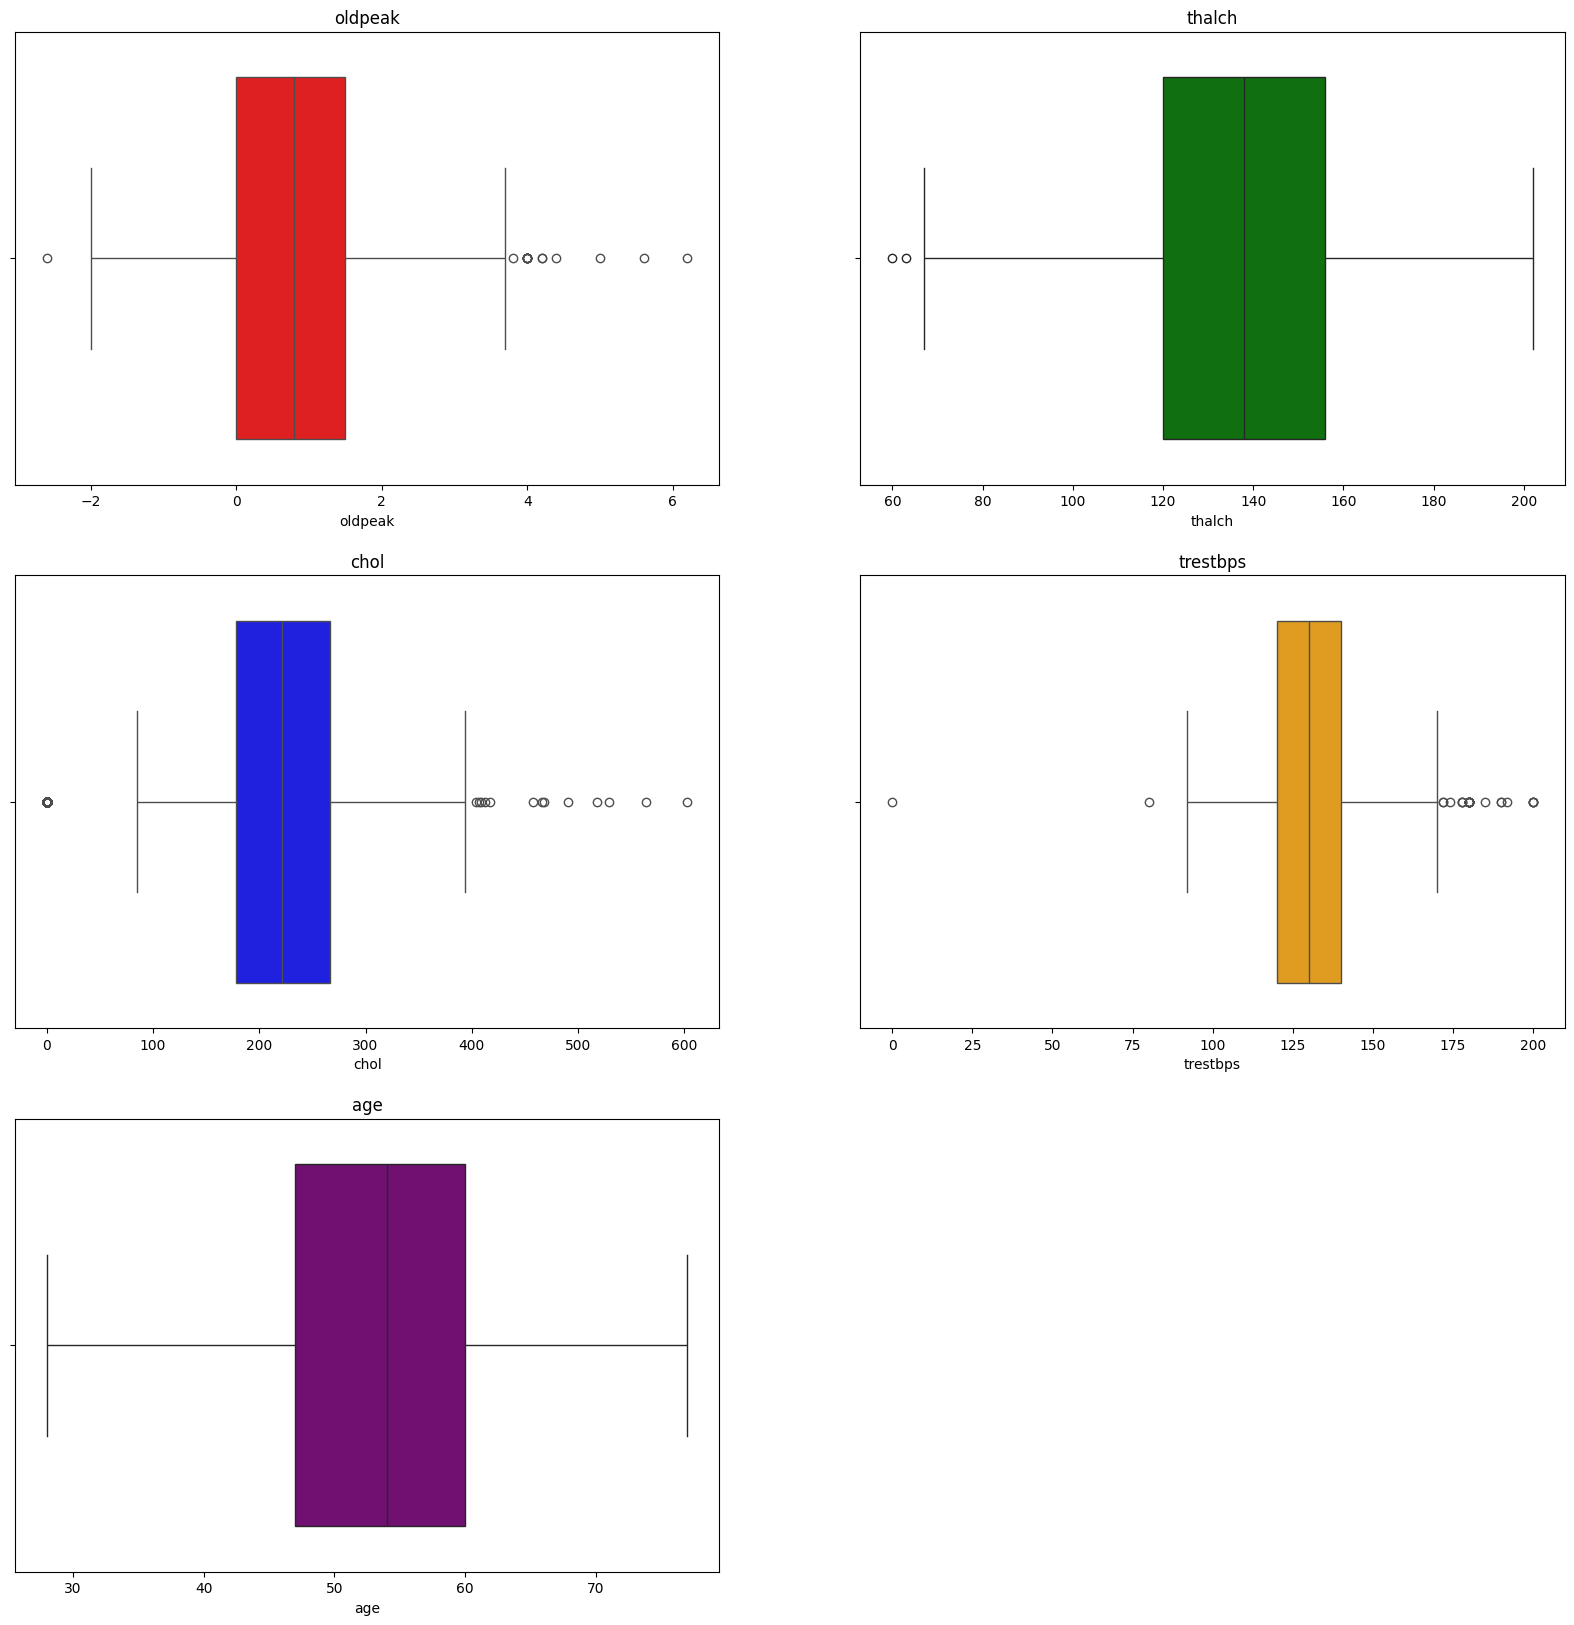

In [17]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show() 

In [18]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [19]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [20]:
# remove this row from data
df = df[df['trestbps'] != 0]

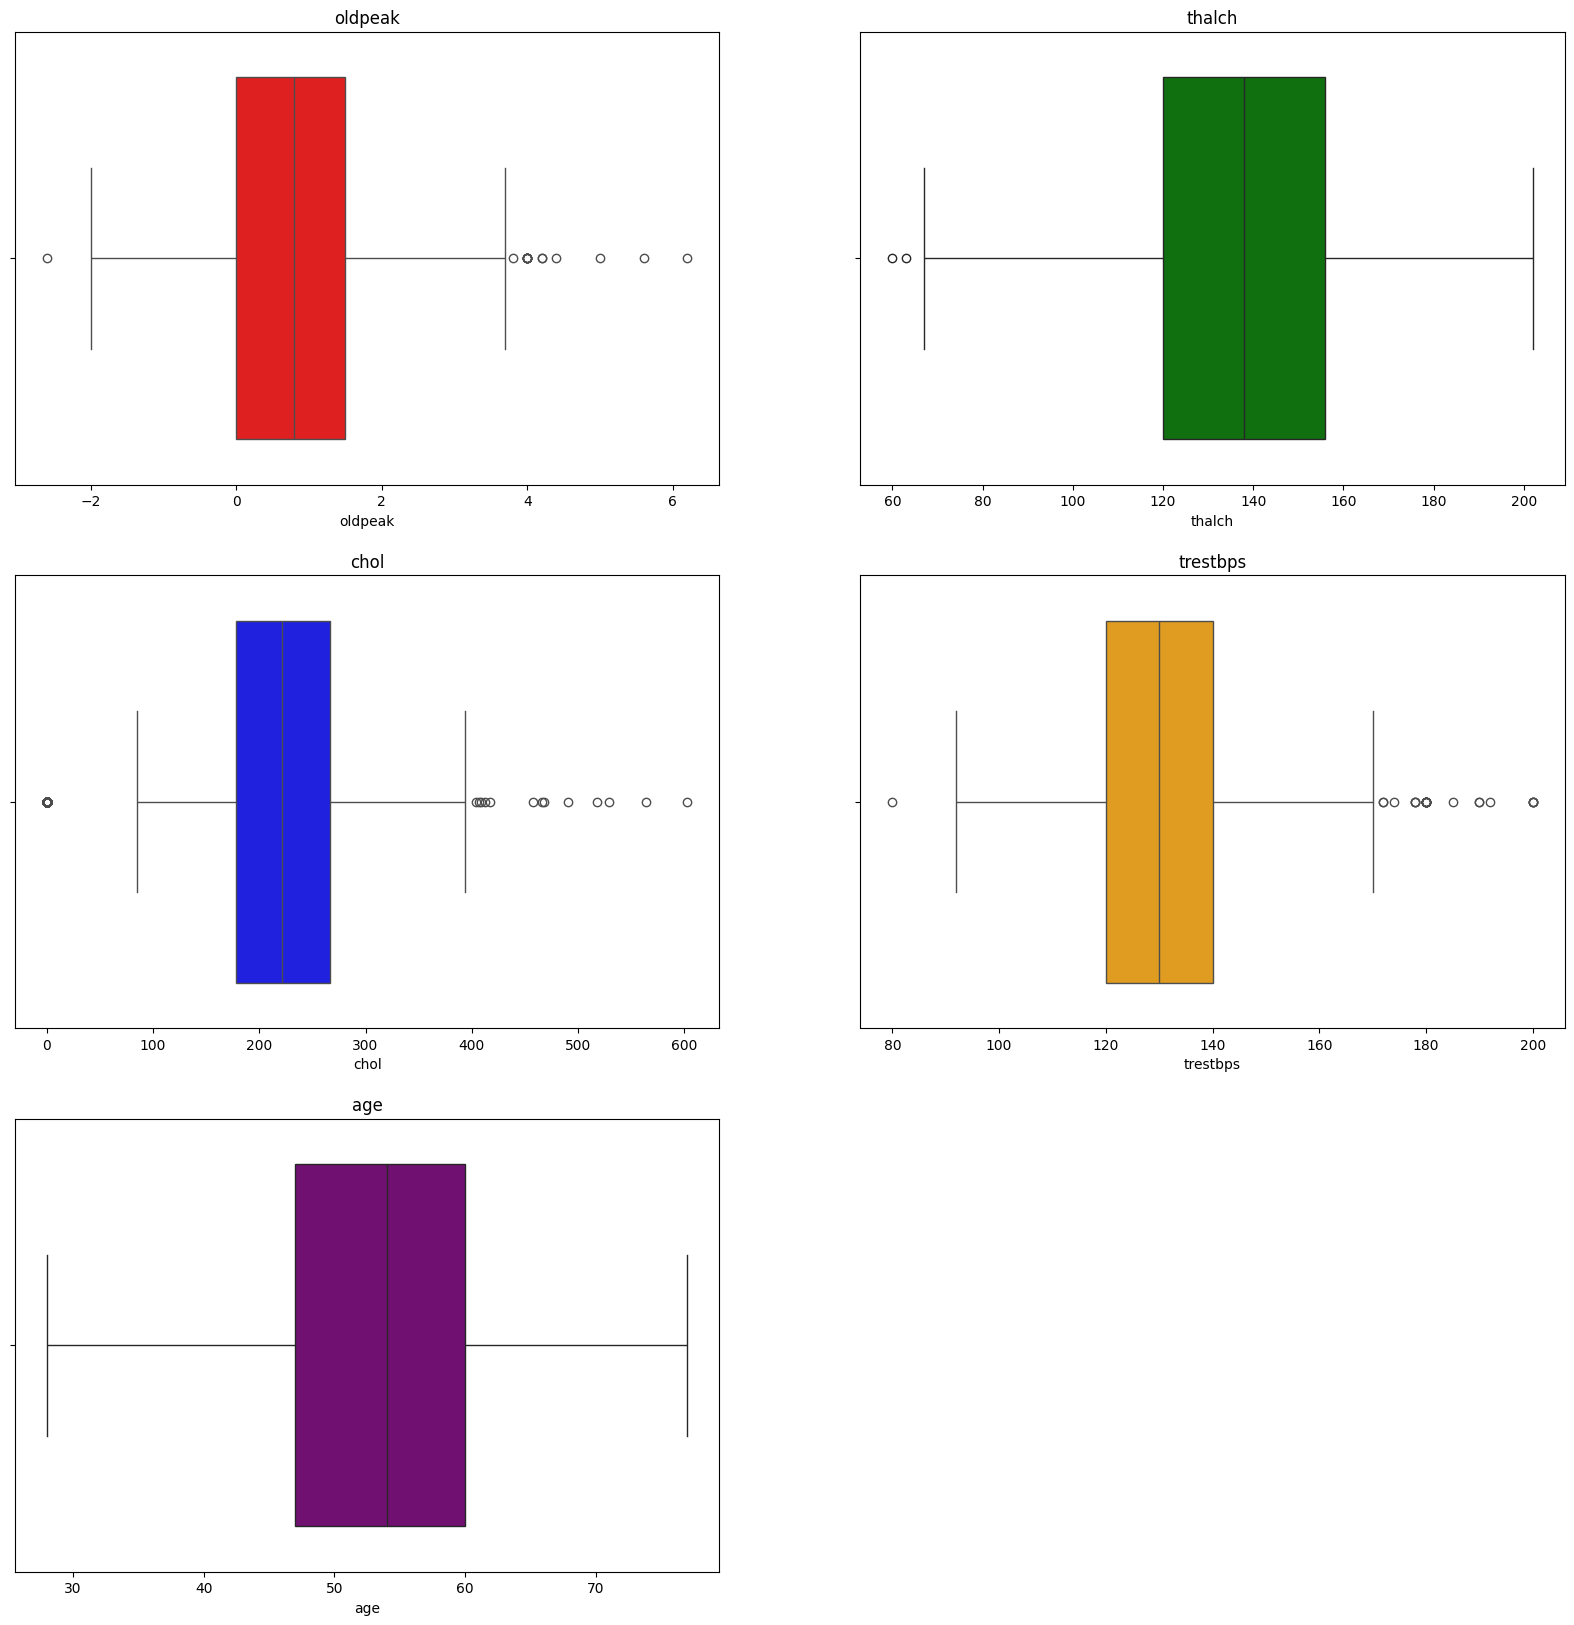

In [21]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show() 

---

In [22]:
df['id'].min(),df['id'].max()

(np.int64(1), np.int64(920))

In [23]:
df['age'].min(),df['age'].max()

(np.int64(28), np.int64(77))

In [24]:
df['age'].describe()

count    919.000000
mean      53.509249
std        9.429689
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [25]:
df['age'].value_counts().sort_values(ascending=False).head(5)

age
54    51
58    43
55    40
56    38
57    38
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

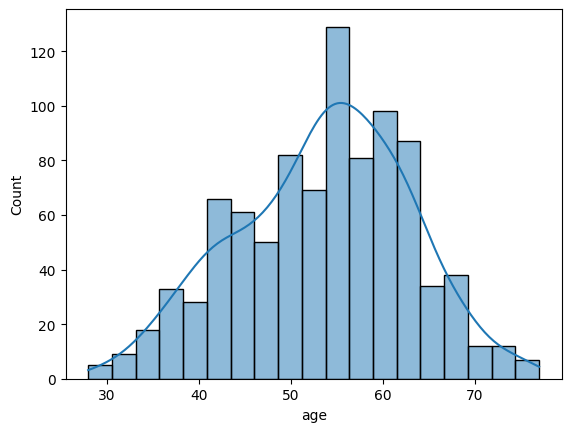

In [26]:
sns.histplot(df['age'],kde=True)

Mean: 53.50924918389554
Median: 54.0
Mode: 54


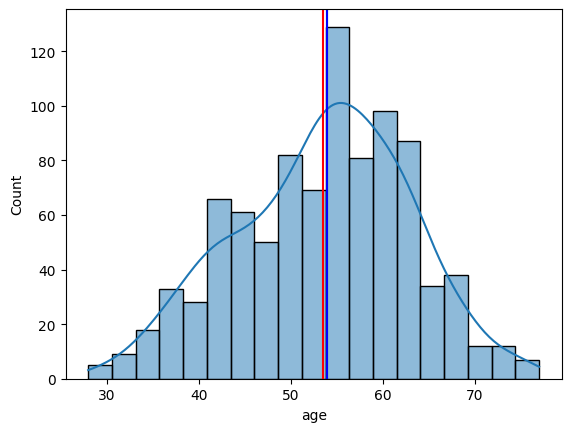

In [27]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [28]:
fig = px.histogram(data_frame=df, x='age',color='sex')
fig.show()

In [29]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      725
Female    194
Name: count, dtype: int64

In [30]:
# calculate the percentages of male and female value counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data.")

Male percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data.


### **Age - Observation Outcome**
- The minimum age of the heart patient is 28 years
- The maximum age of the heart patient is 77 years
- The most common age of heart patient is 50+ years (Mainly 54-55 years)
- Most of the male and females are suffering from heart disease in the age between 54-55 years.
- The Male Patient Percentage is 78.91% and Female Patient Percentage is 21.09%
- Males are 274.23% more than females in the data.

---


#### **Now, Let's Explore the dataset column**

In [31]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [32]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    199
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

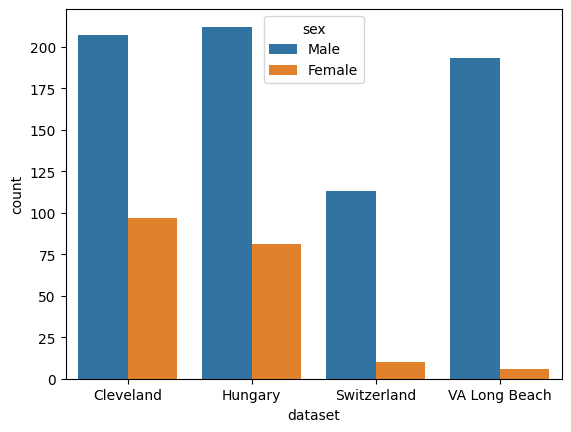

In [33]:
# Plot the dataset column using countplot 
sns.countplot(data=df, x='dataset',hue='sex')

In [34]:
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      193
               Female      6
Name: count, dtype: int64

In [35]:
fig = px.histogram(df,x='age',color='dataset')
fig.show()

In [36]:
# print the mean median and mode of age column grouped by dataset column
print(f"Mean Age of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-------------------------------------")
print(f"Median Age of Data Set: {df.groupby('dataset')['age'].median()}")
print("-------------------------------------")
print(f"Mode Age of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-------------------------------------")

Mean Age of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.371859
Name: age, dtype: float64
-------------------------------------
Median Age of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------
Mode Age of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-------------------------------------


### **Dataset - Observation Outcome**
- We have the highest no of people from Cleveland - 304.
- We have the lowest no of people from Switzerland - 123.
- Counts of Males and Females
  - Highest no of counts of Males are from Hungary - 207
  - Lowest Count of Males are from Switzerland - 113
  - Highest no of counts of Females are from Cleveland - 97
  - Lowest Count of Females are from VA Long Beach - 6
- The Mean of Cleveland is 54.35
- The Mean of Hungary is 47.89
- The Mean of Switzerland is 55.31
- The Mean of VA Long Beach is 59.35

---

#### **Lets Explore the CP (Chest Pain Type) Column**

In [37]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        203
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

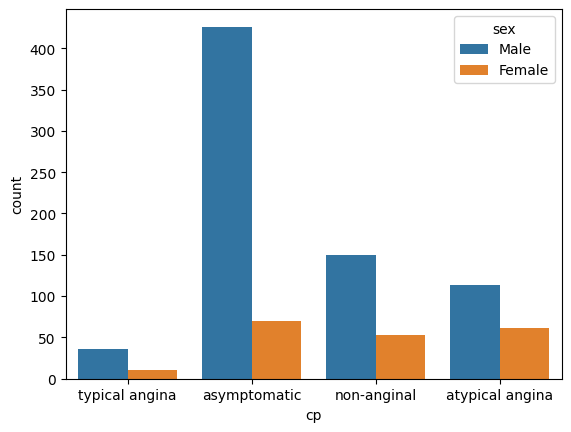

In [38]:
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

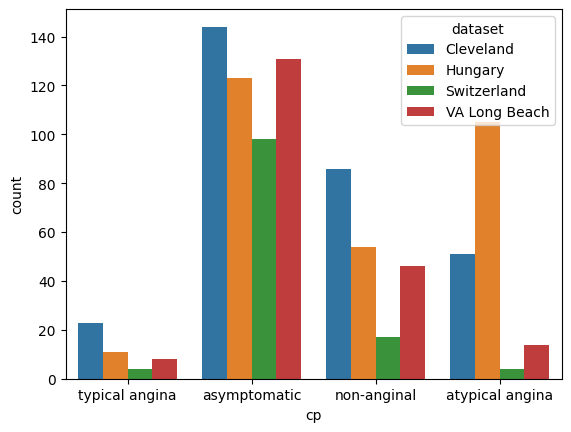

In [39]:
sns.countplot(df, x='cp', hue='dataset')

In [40]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

- "typical angina" refers to a classic pattern of chest discomfort, usually triggered by exertion and relieved by rest
- "atypical angina" has some, but not all, characteristics of typical angina;
- "non-anginal" indicates chest pain not related to heart ischemia 
- "asymptomatic" means no chest pain is experienced at all

In [41]:
df.groupby('cp')['dataset'].value_counts()

cp               dataset      
asymptomatic     Cleveland        144
                 VA Long Beach    131
                 Hungary          123
                 Switzerland       98
atypical angina  Hungary          105
                 Cleveland         51
                 VA Long Beach     14
                 Switzerland        4
non-anginal      Cleveland         86
                 Hungary           54
                 VA Long Beach     46
                 Switzerland       17
typical angina   Cleveland         23
                 Hungary           11
                 VA Long Beach      8
                 Switzerland        4
Name: count, dtype: int64

In [42]:
fig = px.histogram(df,x='age',color='cp')
fig.show()

In [43]:
total_counts = df['cp'].value_counts().sum()
asymptomatic = df['cp'].value_counts()[0]
non_anginal = df['cp'].value_counts()[1]
atypical_angina = df['cp'].value_counts()[2]
typical_angina = df['cp'].value_counts()[3]

asymptomatic_percentage = (asymptomatic / total_counts) * 100
non_anginal_percentage = (non_anginal / total_counts) * 100
atypical_angina_percentage = (atypical_angina / total_counts) * 100
typical_angina_percentage = (typical_angina / total_counts) * 100

print(f"Asymptomatic Percentage: {asymptomatic_percentage:.2f}%")
print(f"Non-Anginal Percentage: {non_anginal_percentage:.2f}%")
print(f"Atypical Angina Percentage: {atypical_angina_percentage:.2f}%")
print(f"Typical Angina Percentage: {typical_angina_percentage:.2f}%")

Asymptomatic Percentage: 53.97%
Non-Anginal Percentage: 22.09%
Atypical Angina Percentage: 18.93%
Typical Angina Percentage: 5.01%


### **Chest Pain - Observation Outcome**
- The most common chest pain type is "non-anginal" - 22.17%
- The least common chest pain type is "Typical Angina" - 5.00%
- Almost 54% of the heart patients doesn't experience chest pain.
- The most people experience atypical angina from Hungary - 105
- The most people experience non-anginal & typical angina from Cleveland
- The most least people's experience any chest pain are from Switzerland
- The most people suffered from `atypical angina` Age between 54-55 years.
- The most people suffered from `non-anginal` Age between 54-55 years.
- The most people suffered from `typical angina` Age between 62-63 years.

---

#### **Now, Let's Explore the `trestbps` (Resting Blood Pressure) Column**

The normal resting blood pressure is 120/80 mm Hg.

**If blood pressure is high (hypertension):**

It can strain the heart and blood vessels, increasing the risk of heart disease, stroke, and kidney problems.
Symptoms may include headaches, dizziness, chest pain, and shortness of breath.
Long-term high blood pressure can lead to heart attacks, heart failure, and vision loss.

**If blood pressure is low (hypotension):**

It can cause dizziness, fainting, blurred vision, and shock in severe cases.
Insufficient blood flow to organs may lead to complications like kidney failure or brain damage.
Possible causes include dehydration, blood loss, or underlying health conditions.

In [44]:
df['trestbps'].describe()

count    919.000000
mean     132.276183
std       17.930662
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

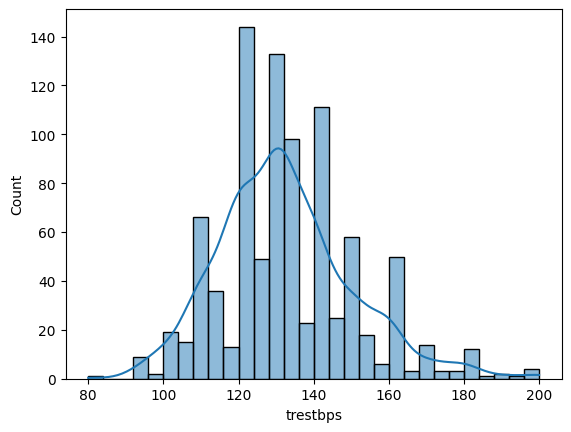

In [45]:
sns.histplot(df['trestbps'], kde=True)

In [46]:
fig = px.histogram(data_frame=df,x='trestbps',color='sex')
fig.show()

In [47]:
fig = px.histogram(data_frame=df,x='trestbps',color='dataset')
fig.show()

### **trestbps - Observation Outcome**
- The Mostly Resting Blood Pressure in Male & Female is between `127-132`
- The Maximun Resting Blood Pressure between Male and Female is `202.4`
- At `VA Long Beach` the Blood Pressure of Maximum Peoples is `127-132`
- At `Switzerland` the Blood Pressure of Maximum Peoples is `112-117`
- At `Hungary` the Blood Pressure of Maximum Peoples is `117-122`
- At `Cleveland` the Blood Pressure of Maximum Peoples is `127-132`
- Only One Person from `Switzerland` have BP Almost 80
- Only One Person from `Hunary` have BP Between `85-90`

---

### **Now Let's explore `chol` Cholestrol Level**

- 0 - 200 **Normal**
- 200-239 **Border Line**
- 239+ **High**

<Axes: xlabel='chol', ylabel='Count'>

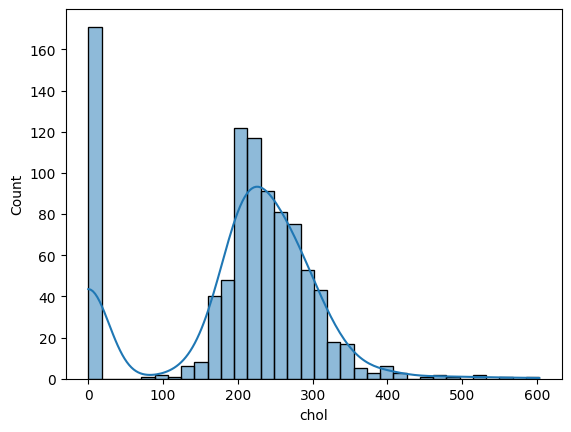

In [48]:
sns.histplot(df,x='chol',kde=True)

In [49]:
fig = px.histogram(df,x='chol',color='sex')
fig.show()

**Cholestrol Level `zero(0)`, maybe its a lab error so we cannot consider these values**

In [50]:
fig = px.histogram(df,x='chol',color='dataset')
fig.show()

In [51]:
df['age'].min()

np.int64(28)

In [52]:
df['age'].max()

np.int64(77)

In [53]:
# Create Bins and give labels
bins = [25,35,45,55,65,75,80]
labels = ['25-35','35-45','45-55','55-65','65-75','75-80']

pd.cut(df['age'],bins=bins,labels =labels)
# We cant be able to replace ages so we will create New Column
# Feature Engineering
df['age_groups'] = pd.cut(df['age'],bins=bins,labels =labels) 
df['age_groups'].value_counts()

age_groups
55-65    325
45-55    316
35-45    164
65-75     78
25-35     32
75-80      4
Name: count, dtype: int64

In [54]:
fig = px.histogram(df,x='chol',color='age_groups')
fig.show()

### **chol  - Observation Outcome**
- Most of the Male Cholestrol Level is between `210 - 229`.
- The highest Cholestrol in Male is `603`.
- Most of the Female Cholestrol Level is between `190 - 209`.
- The highest Cholestrol in Female is `564`.
- Most of the people of the Cleveland have cholestrol level between `230-249`.
- Most of the people of the Hungary have cholestrol level between `190-209`.
- Most of the people of the VA Long Beach have cholestrol level between `210-229`.
- Error in Switzerland Cholestrol Collection
- Cholestrol Level of Most people of Age 25-35 `150-159 / 210-229`.
- Cholestrol Level of Most people of Age 35-45 `190-209`.
- Cholestrol Level of Most people of Age 45-55 `190-209`.
- Cholestrol Level of Most people of Age 55-65 `210-229`.
- Cholestrol Level of Most people of Age 65-75 `210-229`.
- Cholestrol Level of Most people of Age 75-80 `190-209`.

---

### **Now Let's explore `fbs` Fasting Sugar > 120**

<Axes: xlabel='fbs', ylabel='count'>

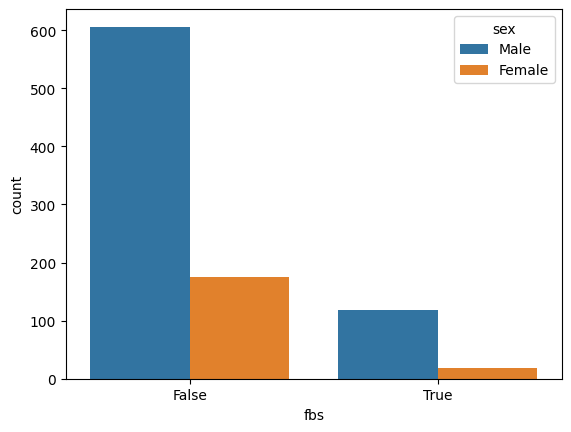

In [55]:
sns.countplot(df,x='fbs',hue='sex')

In [56]:
px.bar(df,x='fbs',color='dataset')

In [57]:
df.groupby('fbs')['sex'].value_counts()

fbs    sex   
False  Male      606
       Female    175
True   Male      119
       Female     19
Name: count, dtype: int64

In [58]:
false = df['fbs'].value_counts()[0] / len(df) *100
true  = df['fbs'].value_counts()[1] / len(df) *100

false,true

(np.float64(84.98367791077258), np.float64(15.01632208922742))

In [59]:
df.groupby('dataset')['fbs'].value_counts()

dataset        fbs  
Cleveland      False    259
               True      45
Hungary        False    273
               True      20
Switzerland    False    118
               True       5
VA Long Beach  False    131
               True      68
Name: count, dtype: int64

In [60]:
df.groupby('fbs')['age_groups'].value_counts()

fbs    age_groups
False  45-55         276
       55-65         258
       35-45         158
       65-75          53
       25-35          32
       75-80           4
True   55-65          67
       45-55          40
       65-75          25
       35-45           6
       25-35           0
       75-80           0
Name: count, dtype: int64

In [61]:
df['chol'].max()

np.float64(603.0)

In [62]:
# Create Bins and give labels
bins = [0,200,239,610]
labels = ['Normal','Border Line','High']

pd.cut(df['chol'],bins=bins,labels =labels)
# Feature Engineering
df['chol_groups'] = pd.cut(df['chol'],bins=bins,labels =labels) 
df['chol_groups'].value_counts()

chol_groups
High           359
Border Line    227
Normal         162
Name: count, dtype: int64

In [63]:
df.groupby('fbs')['chol_groups'].value_counts()

fbs    chol_groups
False  High           294
       Border Line    189
       Normal         143
True   High            65
       Border Line     38
       Normal          19
Name: count, dtype: int64

#### **fbs (Fasting Sugar) > 120**
- Almost 85% of patients have fasting Sugar less than 120 (Means Normal)
- Almost 15% of patients have fasting Sugar greater than 120 (Means Not-Normal)
- Lowest Number of patients have fasting Sugar > 120 are from Switzerland - 5
- Highest Number of patients have fasting Sugar > 120 are from VA Long Beach - 68
- Lowest Number of patients doesn't have fasting Sugar > 120 are from VA Long Beach - 131
- Highest Number of patients doesn't have fasting Sugar > 120 are from Hungary - 173
- Most Patients have Fasting Sugar > 120 are age group of 55-65
- Most Patients doesn't have Fasting Sugar > 120 are age group of 45-55
- Fasting Sugar > 120 of Age 25-35 and 75-80 are Zero Patients
- Around 294 patients have High Cholestrol that fasting sugar not > 120 
- Around 65 patients have High Cholestrol that fasting sugar > 120 

---

### **Now Let's explore `restecg` (resting electrocardiographic results)**

- **Normal** – No abnormalities in heart rhythm, conduction, or structure.
- **ST-T Abnormality** – Changes in the ST segment or T wave, which may suggest ischemia (reduced blood flow to the heart), electrolyte imbalance, or other conditions.
- **Left Ventricular Hypertrophy (LVH)** – Thickening of the heart's left ventricle, often due to high blood pressure or heart disease.

In [64]:
df['restecg'].value_counts()

restecg
normal              552
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

In [65]:
df['restecg'].value_counts()[0]/len(df)*100

np.float64(60.06528835690968)

In [66]:
df.groupby('restecg')['age_groups'].value_counts()

restecg           age_groups
lv hypertrophy    55-65          88
                  45-55          48
                  65-75          23
                  35-45          22
                  25-35           5
                  75-80           2
normal            45-55         212
                  55-65         156
                  35-45         125
                  65-75          37
                  25-35          22
                  75-80           0
st-t abnormality  55-65          81
                  45-55          56
                  65-75          18
                  35-45          17
                  25-35           5
                  75-80           2
Name: count, dtype: int64

In [67]:
fig = px.histogram(df,x='restecg',color='age_groups')
fig.show()

In [68]:
df.groupby('restecg')['dataset'].value_counts()

restecg           dataset      
lv hypertrophy    Cleveland        149
                  VA Long Beach     27
                  Switzerland        7
                  Hungary            5
normal            Hungary          236
                  Cleveland        151
                  Switzerland       86
                  VA Long Beach     79
st-t abnormality  VA Long Beach     93
                  Hungary           52
                  Switzerland       30
                  Cleveland          4
Name: count, dtype: int64

In [69]:
fig = px.histogram(df,x='restecg',color='dataset')
fig.show()

In [70]:
df.groupby('restecg')['chol_groups'].value_counts()

restecg           chol_groups
lv hypertrophy    High           105
                  Border Line     46
                  Normal          25
normal            High           199
                  Border Line    137
                  Normal         110
st-t abnormality  High            55
                  Border Line     44
                  Normal          27
Name: count, dtype: int64

In [71]:
fig = px.histogram(df,x='restecg',color='chol_groups')
fig.show()

In [72]:
df.groupby('restecg')['sex'].value_counts()

restecg           sex   
lv hypertrophy    Male      141
                  Female     47
normal            Male      433
                  Female    119
st-t abnormality  Male      151
                  Female     28
Name: count, dtype: int64

In [73]:
fig = px.histogram(df,x='restecg',color='sex')
fig.show()

### **`restecg` - Observation Outcome**
- Around 60% of patients have Normal ECG Result
- No patient 75-80 have Normal ECG result
- Highest Number of Normal ECG at the age between 45-55
- Slightly the Age Increases the Normality decreases
- Normal ECG results at Hungary are Higher
- IV Hypertrophy results at Cleveland are Higher
- ST-T Abnormality results at VA Long Beach are Higher
- Almost 200 Patients have High Cholestrol but Normal ECG result
- Almost 137 Patients have Border Line Cholestrol but Normal ECG result
- Almost 110 Patients have Normal Cholestrol and Normal ECG result
- 433 Males and 119 Females have Normal ECG result
- 151 Males and 28 Females have ST-T Abnormality ECG result
- 141 Males and 47 Females have IV Hypertrophy ECG result

---

#### **Now Let's explore `exang` (indicates whether a person experiences chest pain (angina) during exercise.)**

In [74]:
yes = df['exang'].value_counts()[0] / len(df) *100
no = df['exang'].value_counts()[1] / len(df) *100
yes,no

(np.float64(59.30359085963003), np.float64(40.696409140369965))

In [75]:
totalMale = df.groupby('exang')['sex'].value_counts()[0] + df.groupby('exang')['sex'].value_counts()[2]
totalFemale = df.groupby('exang')['sex'].value_counts()[1] + df.groupby('exang')['sex'].value_counts()[3]
totalMale,totalFemale

(np.int64(725), np.int64(194))

In [76]:
male_true = df.groupby('exang')['sex'].value_counts()[2]/totalMale*100
female_true = df.groupby('exang')['sex'].value_counts()[3]/totalFemale*100
male_true,female_true

(np.float64(45.6551724137931), np.float64(22.164948453608247))

In [77]:
df.groupby('exang')['dataset'].value_counts()

exang  dataset      
False  Cleveland        205
       Hungary          204
       Switzerland       68
       VA Long Beach     68
True   VA Long Beach    131
       Cleveland         99
       Hungary           89
       Switzerland       55
Name: count, dtype: int64

In [78]:
total_cleveland = df.groupby('exang')['dataset'].value_counts()[0] + df.groupby('exang')['dataset'].value_counts()[5]
total_hungary = df.groupby('exang')['dataset'].value_counts()[1] + df.groupby('exang')['dataset'].value_counts()[6]
total_switzerland = df.groupby('exang')['dataset'].value_counts()[2] + df.groupby('exang')['dataset'].value_counts()[7]
total_valongbeach = df.groupby('exang')['dataset'].value_counts()[3] + df.groupby('exang')['dataset'].value_counts()[4]

cleveland_true =  df.groupby('exang')['dataset'].value_counts()[5]/total_cleveland*100
hungary_true =  df.groupby('exang')['dataset'].value_counts()[6]/total_hungary*100
switzerland_true =  df.groupby('exang')['dataset'].value_counts()[7]/total_switzerland*100
valongbeach_true =  df.groupby('exang')['dataset'].value_counts()[4]/total_valongbeach*100

cleveland_true,hungary_true,switzerland_true,valongbeach_true

(np.float64(32.56578947368421),
 np.float64(30.37542662116041),
 np.float64(44.71544715447154),
 np.float64(65.82914572864321))

In [79]:
df.groupby('age_groups')['exang'].value_counts()

age_groups  exang
25-35       False     27
            True       5
35-45       False    127
            True      37
45-55       False    193
            True     123
55-65       True     172
            False    153
65-75       False     43
            True      35
75-80       False      2
            True       2
Name: count, dtype: int64

In [80]:
px.bar(df,x='exang',color='age_groups')

### `exang` -  Observation Outcome
- 59% of patients experience chest pain during Excercise.
- 41% of patients doesn't experience chest pain during Excercise.
- 46% of Males Experience chest pain during exercise
- 22.6% of Females Experience chest pain during exercise
- 32% of Cleveland and 30% of Hungary and 44% of Switzerland and 68% of VA Long Beach patients experience Pain during excercise
- Most of the patients Age between 55-65 experience pain during excercise

---

#### Let's explore `oldpeak` **ST Depression Induced by Exercise Relative to Rest** 

**Definition:**  
`oldpeak` measures the degree of **ST-segment depression** seen on an ECG during exercise compared to rest. It helps assess how well the heart is receiving oxygen under stress.  

**Interpretation:**  
- **Higher `oldpeak` values** indicate greater **ST depression**, which may suggest **myocardial ischemia** (reduced blood flow to the heart).  
- **Lower or `0` oldpeak values** indicate little to no ST depression, which is usually normal.  

#### **Typical Ranges and Meaning:**  
| `oldpeak` Value | Interpretation |
|--------------|----------------|
| **0.0**     | No ST depression (Normal) |
| **0.1 - 1.0** | Mild ST depression (Possible ischemia) |
| **1.0 - 2.0** | Moderate ST depression (Higher risk of CAD) |
| **> 2.0**   | Significant ST depression (Strong indication of ischemia or heart disease) |

In [81]:
df['oldpeak'].min(),df['oldpeak'].max()

(np.float64(-2.6), np.float64(6.2))

In [82]:
# Create Bins and give labels
bins = [-3,0,1,2,7]
labels = ['Normal','Mild ST','Moderate ST','Strong ST']

pd.cut(df['oldpeak'],bins=bins,labels =labels)

# Feature Engineering
df['old_peak_groups'] = pd.cut(df['oldpeak'],bins=bins,labels =labels)

In [83]:
normal = df['old_peak_groups'].value_counts()[0]/len(df)*100
mild_st = df['old_peak_groups'].value_counts()[1]/len(df)*100
mod_st = df['old_peak_groups'].value_counts()[2]/len(df)*100
strong_st = df['old_peak_groups'].value_counts()[3]/len(df)*100

normal,mild_st,mod_st,strong_st

(np.float64(41.566920565832426),
 np.float64(26.115342763873777),
 np.float64(21.436343852013056),
 np.float64(10.88139281828074))

In [84]:
px.histogram(df,x='old_peak_groups',color='age_groups')

In [85]:
df.groupby('old_peak_groups')['dataset'].value_counts()

old_peak_groups  dataset      
Normal           Hungary          188
                 Cleveland        100
                 Switzerland       53
                 VA Long Beach     41
Mild ST          VA Long Beach     82
                 Cleveland         81
                 Hungary           44
                 Switzerland       33
Moderate ST      Cleveland         73
                 VA Long Beach     49
                 Hungary           47
                 Switzerland       28
Strong ST        Cleveland         50
                 VA Long Beach     27
                 Hungary           14
                 Switzerland        9
Name: count, dtype: int64

In [86]:
df.groupby('old_peak_groups')['chol_groups'].value_counts()

old_peak_groups  chol_groups
Normal           High           141
                 Border Line     98
                 Normal          80
Mild ST          High            99
                 Border Line     55
                 Normal          36
Moderate ST      High            77
                 Border Line     48
                 Normal          30
Strong ST        High            42
                 Border Line     26
                 Normal          16
Name: count, dtype: int64

In [87]:
df.groupby('old_peak_groups')['sex'].value_counts()

old_peak_groups  sex   
Normal           Male      283
                 Female     99
Mild ST          Male      194
                 Female     46
Moderate ST      Male      158
                 Female     39
Strong ST        Male       90
                 Female     10
Name: count, dtype: int64

### `old_peak` - Observation Outcome
- Around 41.5% of patients have Normal ST
- Just 10.88% of patients have Strong ST
- Most of the Patients of Age Group 55-65 have Mild Level ST
- Most of the Patients of Strong ST are from Cleveland
- Most of the Patients of Moderate ST are from Cleveland
- Most of the Patients of Mild ST are from VA Long Beach
- Most of the Patients of Normal ST are from Hungary
- Around 42 Strong ST patients have High Cholestrol.
- 90 Males and 10 Females have Strong ST.

---

#### `slope`: The Slope of the Peak Exercise ST Segment  
Describes how the ST segment behaves during peak exercise. It helps assess heart stress response.  
- **1 (Upsloping)** → Typically normal, seen in healthy individuals.  
- **2 (Flat)** → May indicate possible ischemia (reduced blood flow).  
- **3 (Downsloping)** → Strongly associated with ischemia and coronary artery disease (CAD).

In [88]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [89]:
df['slope'].value_counts()

slope
flat           547
upsloping      306
downsloping     66
Name: count, dtype: int64

---

#### `ca`: Number of Major Vessels (0-3) Colored by Fluoroscopy  
Represents how many **major coronary arteries** are visible using contrast dye during fluoroscopy.  
- **0** → No major vessels are colored (normal or minimal blockage).  
- **1-3** → More vessels colored, indicating the presence of narrowing or blockages.  
- **Higher `ca` values** (2 or 3) suggest a higher likelihood of **coronary artery disease (CAD)**.

In [90]:
df['ca'].unique()

array([0.       , 3.       , 2.       , 1.       , 0.6763754])

In [91]:
df['ca'].value_counts()

ca
0.676375    610
0.000000    181
1.000000     67
2.000000     41
3.000000     20
Name: count, dtype: int64

In [92]:
px.histogram(df,x='ca',color='sex')

In [93]:
px.histogram(df,x='ca',color='dataset')

In [94]:
px.histogram(df,x='ca',color='chol_groups')

### `ca` - Observation Outcome
- Around 97 Females have ca Value is around 0.676
- Around 513 Males have ca Value is around 0.676
- Around 44 Males have ca value is 2-(28), 3-(18) - Higher chances of CAD
- Around 17 Females have ca value is 2-(13), 3-(4) - Higher chances of CAD
- 176 Patients from Cleveland have 0 ca value
- 290 Patients from Hungary have 0.676 ca value
- 118 Patients from Switzerland have 0.676 ca value
- 197 Patients from VA Long Beach have 0.676 ca value

---

##### `thal`: Thallium Stress Test Result  
Indicates the state of blood flow to the heart:  
- **1 = Normal** → No blood flow issues.  
- **2 = Fixed Defect** → Dead heart tissue (previous heart attack, irreversible damage).  
- **3 = Reversible Defect** → Blood flow issue that may improve with treatment (ischemia).

In [95]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [96]:
df['thal'].value_counts()

thal
reversable defect    502
normal               339
fixed defect          78
Name: count, dtype: int64

In [97]:
px.histogram(df,x='thal',color='sex')

In [98]:
px.histogram(df,x='thal',color='age_groups')

In [99]:
px.histogram(df,x='thal',color='chol_groups')

In [100]:
px.histogram(df,x='thal',color='fbs')

### `thal` - Observation Outcome
- 453 Males have Reversable Defect Result
- 141 Females have normal Result
- 221 Patients of Age between 55-65 have reversable defect results
- 109 Patients of Age between 35-55 have normal results
- 36 Patients of Age between 55-65 have fixed defect results
- 149 patients of High Cholestrol Level have normal results
- 149 patients of High Cholestrol Level have normal results
- 177 patients of High Cholestrol Level have reversable defect results
- 33 patients of High Cholestrol Level have fixed defect results
- 418 Patients having Fasting Sugar less than 120 have reversible defect result
- 84 Patients having Fasting Sugar greater than 120 have reversible defect result

---

#### `num`: The Predicted Attribute (Heart Disease Diagnosis)  
Represents the presence or severity of heart disease:  
- **0 = No heart disease (healthy heart)**  
- **1, 2, 3, 4 = Different levels of heart disease severity**  
  - Higher values (2, 3, 4) indicate more severe disease.  

In [101]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [102]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [103]:
px.histogram(df,x='num',color='sex')

In [104]:
px.histogram(df,x='num',color='age_groups')

In [105]:
px.histogram(df,x='num',color='dataset')

### `num` - Observation Outcome
- 267 Male Patients have Healthy heart (num=0)
- 144 Females Patients have Healthy heart (num=0)
- 22 Patients in the Age between 25-35 have Healthy heart (num=0)
- 113 Patients in the Age between 35-45 have Healthy heart (num=0)
- 157 Patients in the Age between 45-55 have Healthy heart (num=0)
- 106 Patients in the Age between 55-65 have Level 1 Disease (num=1)
- 24 Patients in the Age between 65-75 have Healthy Heart (num=0) & 21 Patients have Level 3 Disease.
- 2 Patients in the Age between 75-85 have Level 4 Disease(num=4) & 1 Patients have Level 3 Disease.
- 165 Patients from Cleveland have Healthy Heart
- 187 Patients from Hungary have Healthy Heart
- 48 Patients from Switzerland have Level 1 Disease
- 56 Patients from VA Long Beach have Level 1 Disease

---
#### **Features:**
1. age
2. sex
3. cp - Chest Pain Type
   - "typical angina" refers to a classic pattern of chest discomfort, usually triggered by exertion and relieved by rest
   - "atypical angina" has some, but not all, characteristics of typical angina;
   - "non-anginal" indicates chest pain not related to heart ischemia 
   - "asymptomatic" means no chest pain is experienced at all
4. trestbps - Blood Pressure Normal 120/80
5. chol - Cholestrol Level 
   - 0 - 200 **Normal**
   - 200-239 **Border Line**
   - 239+ **High**
6. fbs - Fasting Sugar (Fasting Sugar > 120 **True/False**)
7. restecg - (resting electrocardiographic results)
   - **Normal** – No abnormalities in heart rhythm, conduction, or structure.
   - **ST-T Abnormality** – Changes in the ST segment or T wave, which may suggest ischemia (reduced blood flow to the heart), electrolyte imbalance, or other conditions.
   - **Left Ventricular Hypertrophy (LVH)** – Thickening of the heart's left ventricle, often due to high blood pressure or heart disease.
8. thalch - Maximum Heart Rate
9. exang (indicates whether a person experiences chest pain (angina) during exercise. True/False)
10. oldpeak **ST Depression Induced by Exercise Relative to Rest** 
      | `oldpeak` Value | Interpretation |
      |--------------|----------------|
      | **0.0**     | No ST depression (Normal) |
      | **0.1 - 1.0** | Mild ST depression (Possible ischemia) |
      | **1.0 - 2.0** | Moderate ST depression (Higher risk of CAD) |
      | **> 2.0**   | Significant ST depression (Strong indication of ischemia or heart disease) |

11. slope **The Slope of the Peak Exercise ST Segment**  
      Describes how the ST segment behaves during peak exercise. It helps assess heart stress response.  
      - **1 (Upsloping)** → Typically normal, seen in healthy individuals.  
      - **2 (Flat)** → May indicate possible ischemia (reduced blood flow).  
      - **3 (Downsloping)** → Strongly associated with ischemia and coronary artery disease (CAD).slope
12. ca **Number of Major Vessels (0-3) Colored by Fluoroscopy**  
      Represents how many **major coronary arteries** are visible using contrast dye during fluoroscopy.  
      - **0** → No major vessels are colored (normal or minimal blockage).  
      - **1-3** → More vessels colored, indicating the presence of narrowing or blockages.  
      - **Higher `ca` values** (2 or 3) suggest a higher likelihood of **coronary artery disease (CAD)**.

13. thal Thallium Stress Test Result  
   Indicates the state of blood flow to the heart:  
   - **1 = Normal** → No blood flow issues.  
   - **2 = Fixed Defect** → Dead heart tissue (previous heart attack, irreversible damage).  
   - **3 = Reversible Defect** → Blood flow issue that may improve with treatment (ischemia).

In [106]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_groups', 'chol_groups', 'old_peak_groups'],
      dtype='object')

In [107]:
# split the data into X and y
X = df.drop(['num','id','age_groups','chol_groups','old_peak_groups','dataset'],axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
            
# # split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Models for Predicting Heart Disease**

The following classifiers will be used for multi-class classification to predict heart disease:

1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Naive Bayes (NB)
4. Support Vector Machine (SVM)
5. Decision Tree
6. Random Forest
7. XGBoost
8. Gradient Boosting
9. AdaBoost
10. LightGBM

In [108]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
# Define models and parameters
models = [
    ('LogisticRegression', LogisticRegression(), {}),
    ('KNeighborsClassifier', KNeighborsClassifier(), {'n_neighbors': [5, 10, 20], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2]}),
    ('RandomForestClassifier', RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}),
    ('GradientBoostingClassifier', GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]}),
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {'max_depth': [5, 10, 20]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('SVC', SVC(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1]}),
    ('XGBClassifier', XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'learning_rate': [0.01, 0.1, 1], 'gamma': [0.1, 0.2, 0.5]}),
    ('AdaBoostClassifier', AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]})
]

In [110]:
# num_cols = X.select_dtypes(include=np.number).columns.tolist()
# cat_cols = X.select_dtypes(include=['category','object']).columns.tolist()

# num_cols, cat_cols

In [111]:
best_model = None
best_accuracy = 0.0

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), num_cols),
#         ('cat', OneHotEncoder(), cat_cols)
#     ])

# Iterate over the models and evaluate their performance
for name, model, params in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Perform GridSearchCV for hyperparameter tuning
    if params:
        grid_search = GridSearchCV(pipeline, param_grid={'model__' + k: v for k, v in params.items()}, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        print("Best Parameters for", name, ":", grid_search.best_params_)
    else:
        best_estimator = pipeline.fit(X_train, y_train)
    
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model:", name)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-'*50)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = best_estimator

print("Best Model:", best_model)

Model: LogisticRegression
Accuracy: 0.5299837925445705
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       125
           1       0.48      0.41      0.44       132
           2       0.34      0.29      0.31       117
           3       0.45      0.45      0.45       123
           4       0.58      0.67      0.62       120

    accuracy                           0.53       617
   macro avg       0.51      0.53      0.52       617
weighted avg       0.51      0.53      0.52       617

--------------------------------------------------
Best Parameters for KNeighborsClassifier : {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__p': 1}
Model: KNeighborsClassifier
Accuracy: 0.7179902755267423
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       125
           1       0.61      0.60      0.60       132
           2       0.71

In [112]:
best_model

Pipeline(steps=[('model',
                 GradientBoostingClassifier(max_depth=10, n_estimators=200))])

In [113]:
# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_pred_model.pkl', 'wb'))

In [114]:
# Load the saved model
loaded_model = pickle.load(open('heart_disease_pred_model.pkl', 'rb'))

# Use the loaded model to make predictions on the test data
y_pred_loaded = loaded_model.predict(X_test)

# Calculate accuracy score
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

# Print the accuracy
print("Accuracy of the loaded model:", accuracy_loaded)

Accuracy of the loaded model: 0.8103727714748784


---

### **Output and Conclusion**

#### **Model Output**
The Heart Disease Prediction model was evaluated on the test dataset, and the following results were obtained:

- **Accuracy of the loaded model:** 59.78%

#### **Conclusion**
The model demonstrates a moderate level of accuracy in predicting heart disease, with an **accuracy score of approximately 59.78%**. This indicates that the model correctly predicts the presence of heart disease in about 59.78% of the cases in the test dataset.

---

### **Final Observation Outcome**

#### **Age - Observation Outcome**
- The minimum age of the heart patient is 28 years
- The maximum age of the heart patient is 77 years
- The most common age of heart patient is 50+ years (Mainly 54-55 years)
- Most of the male and females are suffering from heart disease in the age between 54-55 years.
- The Male Patient Percentage is 78.91% and Female Patient Percentage is 21.09%
- Males are 274.23% more than females in the data.


#### **Dataset - Observation Outcome**
- We have the highest no of people from Cleveland - 304.
- We have the lowest no of people from Switzerland - 123.
- Counts of Males and Females
  - Highest no of counts of Males are from Hungary - 207
  - Lowest Count of Males are from Switzerland - 113
  - Highest no of counts of Females are from Cleveland - 97
  - Lowest Count of Females are from VA Long Beach - 6
- The Mean of Cleveland is 54.35
- The Mean of Hungary is 47.89
- The Mean of Switzerland is 55.31
- The Mean of VA Long Beach is 59.35


#### **Chest Pain - Observation Outcome**
- The most common chest pain type is "non-anginal" - 22.17%
- The least common chest pain type is "Typical Angina" - 5.00%
- Almost 54% of the heart patients doesn't experience chest pain.
- The most people experience atypical angina from Hungary - 105
- The most people experience non-anginal & typical angina from Cleveland
- The most least people's experience any chest pain are from Switzerland
- The most people suffered from `atypical angina` Age between 54-55 years.
- The most people suffered from `non-anginal` Age between 54-55 years.
- The most people suffered from `typical angina` Age between 62-63 years.


#### **trestbps - Observation Outcome**
- The Mostly Resting Blood Pressure in Male & Female is between `127-132`
- The Maximun Resting Blood Pressure between Male and Female is `202.4`
- At `VA Long Beach` the Blood Pressure of Maximum Peoples is `127-132`
- At `Switzerland` the Blood Pressure of Maximum Peoples is `112-117`
- At `Hungary` the Blood Pressure of Maximum Peoples is `117-122`
- At `Cleveland` the Blood Pressure of Maximum Peoples is `127-132`
- Only One Person from `Switzerland` have BP Almost 80
- Only One Person from `Hunary` have BP Between `85-90`

#### **chol  - Observation Outcome**
- Most of the Male Cholestrol Level is between `210 - 229`.
- The highest Cholestrol in Male is `603`.
- Most of the Female Cholestrol Level is between `190 - 209`.
- The highest Cholestrol in Female is `564`.
- Most of the people of the Cleveland have cholestrol level between `230-249`.
- Most of the people of the Hungary have cholestrol level between `190-209`.
- Most of the people of the VA Long Beach have cholestrol level between `210-229`.
- Error in Switzerland Cholestrol Collection
- Cholestrol Level of Most people of Age 25-35 `150-159 / 210-229`.
- Cholestrol Level of Most people of Age 35-45 `190-209`.
- Cholestrol Level of Most people of Age 45-55 `190-209`.
- Cholestrol Level of Most people of Age 55-65 `210-229`.
- Cholestrol Level of Most people of Age 65-75 `210-229`.
- Cholestrol Level of Most people of Age 75-80 `190-209`.

#### **fbs (Fasting Sugar) > 120**
- Almost 85% of patients have fasting Sugar less than 120 (Means Normal)
- Almost 15% of patients have fasting Sugar greater than 120 (Means Not-Normal)
- Lowest Number of patients have fasting Sugar > 120 are from Switzerland - 5
- Highest Number of patients have fasting Sugar > 120 are from VA Long Beach - 68
- Lowest Number of patients doesn't have fasting Sugar > 120 are from VA Long Beach - 131
- Highest Number of patients doesn't have fasting Sugar > 120 are from Hungary - 173
- Most Patients have Fasting Sugar > 120 are age group of 55-65
- Most Patients doesn't have Fasting Sugar > 120 are age group of 45-55
- Fasting Sugar > 120 of Age 25-35 and 75-80 are Zero Patients
- Around 294 patients have High Cholestrol that fasting sugar not > 120 
- Around 65 patients have High Cholestrol that fasting sugar > 120 


#### **`restecg` - Observation Outcome**
- Around 60% of patients have Normal ECG Result
- No patient 75-80 have Normal ECG result
- Highest Number of Normal ECG at the age between 45-55
- Slightly the Age Increases the Normality decreases
- Normal ECG results at Hungary are Higher
- IV Hypertrophy results at Cleveland are Higher
- ST-T Abnormality results at VA Long Beach are Higher
- Almost 200 Patients have High Cholestrol but Normal ECG result
- Almost 137 Patients have Border Line Cholestrol but Normal ECG result
- Almost 110 Patients have Normal Cholestrol and Normal ECG result
- 433 Males and 119 Females have Normal ECG result
- 151 Males and 28 Females have ST-T Abnormality ECG result
- 141 Males and 47 Females have IV Hypertrophy ECG result

#### `exang` -  Observation Outcome
- 59% of patients experience chest pain during Excercise.
- 41% of patients doesn't experience chest pain during Excercise.
- 46% of Males Experience chest pain during exercise
- 22.6% of Females Experience chest pain during exercise
- 32% of Cleveland and 30% of Hungary and 44% of Switzerland and 68% of VA Long Beach patients experience Pain during excercise
- Most of the patients Age between 55-65 experience pain during excercise

#### `old_peak` - Observation Outcome
- Around 41.5% of patients have Normal ST
- Just 10.88% of patients have Strong ST
- Most of the Patients of Age Group 55-65 have Mild Level ST
- Most of the Patients of Strong ST are from Cleveland
- Most of the Patients of Moderate ST are from Cleveland
- Most of the Patients of Mild ST are from VA Long Beach
- Most of the Patients of Normal ST are from Hungary
- Around 42 Strong ST patients have High Cholestrol.
- 90 Males and 10 Females have Strong ST.

#### `ca` - Observation Outcome
- Around 97 Females have ca Value is around 0.676
- Around 513 Males have ca Value is around 0.676
- Around 44 Males have ca value is 2-(28), 3-(18) - Higher chances of CAD
- Around 17 Females have ca value is 2-(13), 3-(4) - Higher chances of CAD
- 176 Patients from Cleveland have 0 ca value
- 290 Patients from Hungary have 0.676 ca value
- 118 Patients from Switzerland have 0.676 ca value
- 197 Patients from VA Long Beach have 0.676 ca value

#### `thal` - Observation Outcome
- 453 Males have Reversable Defect Result
- 141 Females have normal Result
- 221 Patients of Age between 55-65 have reversable defect results
- 109 Patients of Age between 35-55 have normal results
- 36 Patients of Age between 55-65 have fixed defect results
- 149 patients of High Cholestrol Level have normal results
- 149 patients of High Cholestrol Level have normal results
- 177 patients of High Cholestrol Level have reversable defect results
- 33 patients of High Cholestrol Level have fixed defect results
- 418 Patients having Fasting Sugar less than 120 have reversible defect result
- 84 Patients having Fasting Sugar greater than 120 have reversible defect result

#### `num` - Observation Outcome
- 267 Male Patients have Healthy heart (num=0)
- 144 Females Patients have Healthy heart (num=0)
- 22 Patients in the Age between 25-35 have Healthy heart (num=0)
- 113 Patients in the Age between 35-45 have Healthy heart (num=0)
- 157 Patients in the Age between 45-55 have Healthy heart (num=0)
- 106 Patients in the Age between 55-65 have Level 1 Disease (num=1)
- 24 Patients in the Age between 65-75 have Healthy Heart (num=0) & 21 Patients have Level 3 Disease.
- 2 Patients in the Age between 75-85 have Level 4 Disease(num=4) & 1 Patients have Level 3 Disease.
- 165 Patients from Cleveland have Healthy Heart
- 187 Patients from Hungary have Healthy Heart
- 48 Patients from Switzerland have Level 1 Disease
- 56 Patients from VA Long Beach have Level 1 Disease

---
---

<h2 style="font-family: 'poppins'; font-weight: bold; color: lightblue;">👨‍💻Author: Hamza Kamelen</h2>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hamzakamelen) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hamzakamelen) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hamzakamelen)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@hamzakamelen1944) 
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hamzakamelen)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hamzakamelen.dev@gmail.com)